## Reproduce Supp. Fig. 10a (bottom line) and Supp. Fig. 10f
Compute a PCA of UniRep from the deep mutational scanning stability data from Rocklin (2017). Use the first principle component to make the lower line (labelled UniRep PC1) in Supp. Fig. 10a

In [1]:
import numpy as np
import Levenshtein
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import sys
import random
import os
import Levenshtein
import fastcluster as fc
import scipy.cluster.hierarchy as hier
import pickle
import palettable as pal
import scipy.stats as scistats
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names, save_for_pub, label_point
from common.embedding_tools import lev_dist_matrix, lev_sim_matrix

%matplotlib inline
random.seed(42)
np.random.seed(42)

In [2]:
# This has all of the predictions for avg_hidden and the best baselines, the true values etc
ssm2 = pd.read_pickle(
    "../../data/for_ethan_rocklin_ssm2_remote_test_with_all_predictions.pkl"
)
ssm2

,sequence,phenotype,is_train,is_test,phenotype_name,dataset,RGN,all_1900,phenotype_class,3grams,simple_freq_and_len,predictions__3grams,predictions__simple_freq_and_len,predictions__all_1900,predictions__avg_hidden,avg_hidden
28239,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR,0.85,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.21271392703056333, 0.019481187686324123, 0...","[0.013220085762441158, -0.023351950570940968, ...",remote,"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...","[0.09302325581395349, 0.0, 0.02325581395348837...",0.964102,1.193758,0.936604,0.807520,"[0.013220085762441158, -0.023351950570940968, ..."
28240,TTIKVNGQEYTVPLSPEQEAKAAKKRWPDYEVQIHGNTVKVTR,0.23,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.20818178355693817, 0.007391529157757759, 0...","[0.014329218305647371, -0.02933450974524021, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.817555,0.622040,"[0.014329218305647371, -0.02933450974524021, 0..."
28241,TTIKVNGQEYTVPLSPEQFAKAAKKRWPDYEVQIHGNTVKVTR,0.55,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.2437765300273895, 0.025648575276136402, 0....","[0.012737787328660488, -0.01781645603477955, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.948953,0.882067,"[0.012737787328660488, -0.01781645603477955, 0..."
28242,TTIKVNGQEYTVPLSPEQGAKAAKKRWPDYEVQIHGNTVKVTR,0.53,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.25308060646057123, 0.02913985215127468, 0....","[0.012358135543763638, -0.02748880535364151, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.832758,0.570334,"[0.012358135543763638, -0.02748880535364151, 0..."
28243,TTIKVNGQEYTVPLSPEQHAKAAKKRWPDYEVQIHGNTVKVTR,0.26,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.2366831302642822, 0.021316055208444595, 0....","[0.01387482788413763, -0.02931960299611092, 0....",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.200495,0.834405,0.635680,"[0.01387482788413763, -0.02931960299611092, 0...."
28244,TTIKVNGQEYTVPLSPEQIAKAAKKRWPDYEVQIHGNTVKVTR,0.62,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.22376541793346402, 0.023250414058566093, 0...","[0.012546432204544544, -0.020154334604740143, ...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.217558,0.962485,0.913663,"[0.012546432204544544, -0.020154334604740143, ..."
28245,TTIKVNGQEYTVPLSPEQLAKAAKKRWPDYEVQIHGNTVKVTR,0.61,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.22253496944904327, 0.02506059221923351, 0....","[0.012977829203009605, -0.0186515673995018, 0....",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.108702,0.929838,0.897428,"[0.012977829203009605, -0.0186515673995018, 0...."
28246,TTIKVNGQEYTVPLSPEQMAKAAKKRWPDYEVQIHGNTVKVTR,0.56,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.22512851655483246, 0.017535654827952385, 0...","[0.013029231689870358, -0.021590715274214745, ...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.930747,0.856286,"[0.013029231689870358, -0.021590715274214745, ..."
28247,TTIKVNGQEYTVPLSPEQNAKAAKKRWPDYEVQIHGNTVKVTR,0.38,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.21804973483085632, 0.021629091352224347, 0...","[0.013440840877592564, -0.02641294151544571, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.791375,0.553257,"[0.013440840877592564, -0.02641294151544571, 0..."
28248,TTIKVNGQEYTVPLSPEQRAKAAK

In [3]:
ssm2 = ssm2.reset_index(drop=True)

In [4]:
ssm2

,sequence,phenotype,is_train,is_test,phenotype_name,dataset,RGN,all_1900,phenotype_class,3grams,simple_freq_and_len,predictions__3grams,predictions__simple_freq_and_len,predictions__all_1900,predictions__avg_hidden,avg_hidden
0,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR,0.85,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.21271392703056333, 0.019481187686324123, 0...","[0.013220085762441158, -0.023351950570940968, ...",remote,"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...","[0.09302325581395349, 0.0, 0.02325581395348837...",0.964102,1.193758,0.936604,0.807520,"[0.013220085762441158, -0.023351950570940968, ..."
1,TTIKVNGQEYTVPLSPEQEAKAAKKRWPDYEVQIHGNTVKVTR,0.23,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.20818178355693817, 0.007391529157757759, 0...","[0.014329218305647371, -0.02933450974524021, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.817555,0.622040,"[0.014329218305647371, -0.02933450974524021, 0..."
2,TTIKVNGQEYTVPLSPEQFAKAAKKRWPDYEVQIHGNTVKVTR,0.55,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.2437765300273895, 0.025648575276136402, 0....","[0.012737787328660488, -0.01781645603477955, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.948953,0.882067,"[0.012737787328660488, -0.01781645603477955, 0..."
3,TTIKVNGQEYTVPLSPEQGAKAAKKRWPDYEVQIHGNTVKVTR,0.53,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.25308060646057123, 0.02913985215127468, 0....","[0.012358135543763638, -0.02748880535364151, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.832758,0.570334,"[0.012358135543763638, -0.02748880535364151, 0..."
4,TTIKVNGQEYTVPLSPEQHAKAAKKRWPDYEVQIHGNTVKVTR,0.26,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.2366831302642822, 0.021316055208444595, 0....","[0.01387482788413763, -0.02931960299611092, 0....",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.200495,0.834405,0.635680,"[0.01387482788413763, -0.02931960299611092, 0...."
5,TTIKVNGQEYTVPLSPEQIAKAAKKRWPDYEVQIHGNTVKVTR,0.62,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.22376541793346402, 0.023250414058566093, 0...","[0.012546432204544544, -0.020154334604740143, ...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.217558,0.962485,0.913663,"[0.012546432204544544, -0.020154334604740143, ..."
6,TTIKVNGQEYTVPLSPEQLAKAAKKRWPDYEVQIHGNTVKVTR,0.61,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.22253496944904327, 0.02506059221923351, 0....","[0.012977829203009605, -0.0186515673995018, 0....",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.108702,0.929838,0.897428,"[0.012977829203009605, -0.0186515673995018, 0...."
7,TTIKVNGQEYTVPLSPEQMAKAAKKRWPDYEVQIHGNTVKVTR,0.56,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.22512851655483246, 0.017535654827952385, 0...","[0.013029231689870358, -0.021590715274214745, ...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.930747,0.856286,"[0.013029231689870358, -0.021590715274214745, ..."
8,TTIKVNGQEYTVPLSPEQNAKAAKKRWPDYEVQIHGNTVKVTR,0.38,True,False,EEHEE_rd3_0037.pdb_ssm2_stability,rocklin_ssm2,"[-0.21804973483085632, 0.021629091352224347, 0...","[0.013440840877592564, -0.02641294151544571, 0...",remote,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.06976744186046512, 0.0, 0.02325581395348837...",0.964102,1.193758,0.791375,0.553257,"[0.013440840877592564, -0.02641294151544571, 0..."
9,TTIKVNGQEYTVPLSPEQRAKAAKKRWPDYEVQIHGNTVKVTR,0.17,True,False,EEHE

In [5]:
wt_ssm2 = pd.read_csv("../../data/just_wt_ssm2_sequences.csv", index_col=0).loc[:,['name', 'sequence']]
wt_ssm2

,name,sequence
0,EEHEE_rd3_0037.pdb,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR
775,EEHEE_rd3_1498.pdb,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH
1550,EEHEE_rd3_1702.pdb,TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT
2325,EEHEE_rd3_1716.pdb,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE
3100,EHEE_0882.pdb,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT
3821,EHEE_rd2_0005.pdb,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR
4542,EHEE_rd3_0015.pdb,GSSKTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE
5263,HEEH_rd2_0779.pdb,TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK
6038,HEEH_rd3_0223.pdb,TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY
6813,HEEH_rd3_0726.pdb,TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK


In [6]:
wt_ssm2['avg_hidden'] = ssm2.set_index(
    "sequence"
).loc[wt_ssm2.sequence.values.tolist(),"avg_hidden"].values

In [7]:
wt_ssm2

,name,sequence,avg_hidden
0,EEHEE_rd3_0037.pdb,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR,"[0.013220085762441158, -0.023351950570940968, ..."
775,EEHEE_rd3_1498.pdb,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH,"[0.01112688984721899, -0.03689838945865631, 0...."
1550,EEHEE_rd3_1702.pdb,TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT,"[0.017062272876501083, -0.044861219823360436, ..."
2325,EEHEE_rd3_1716.pdb,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE,"[0.017472293227910995, -0.028675520792603493, ..."
3100,EHEE_0882.pdb,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,"[0.016383739188313484, -0.05981503427028656, 0..."
3821,EHEE_rd2_0005.pdb,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR,"[0.016525082290172573, -0.048218082636594765, ..."
4542,EHEE_rd3_0015.pdb,GSSKTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE,"[0.01443901564925909, -0.09203299880027772, 0...."
5263,HEEH_rd2_0779.pdb,TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK,"[0.017343226820230484, -0.10412610322237016, 0..."
6038,HEEH_rd3_0223.pdb,TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY,"[0.010080013424158095, 0.01228928565979004, 0...."
6813,HEEH_rd3_0726.pdb,TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK,"[0.012133357115089892, -0.05131711065769196, 0..."


In [8]:
pca = PCA(n_components=10)
pca.fit(
    wt_ssm2.avg_hidden.tolist()
)
components = pca.transform(wt_ssm2.avg_hidden.tolist())

In [9]:
wt_ssm2 = wt_ssm2.reset_index()

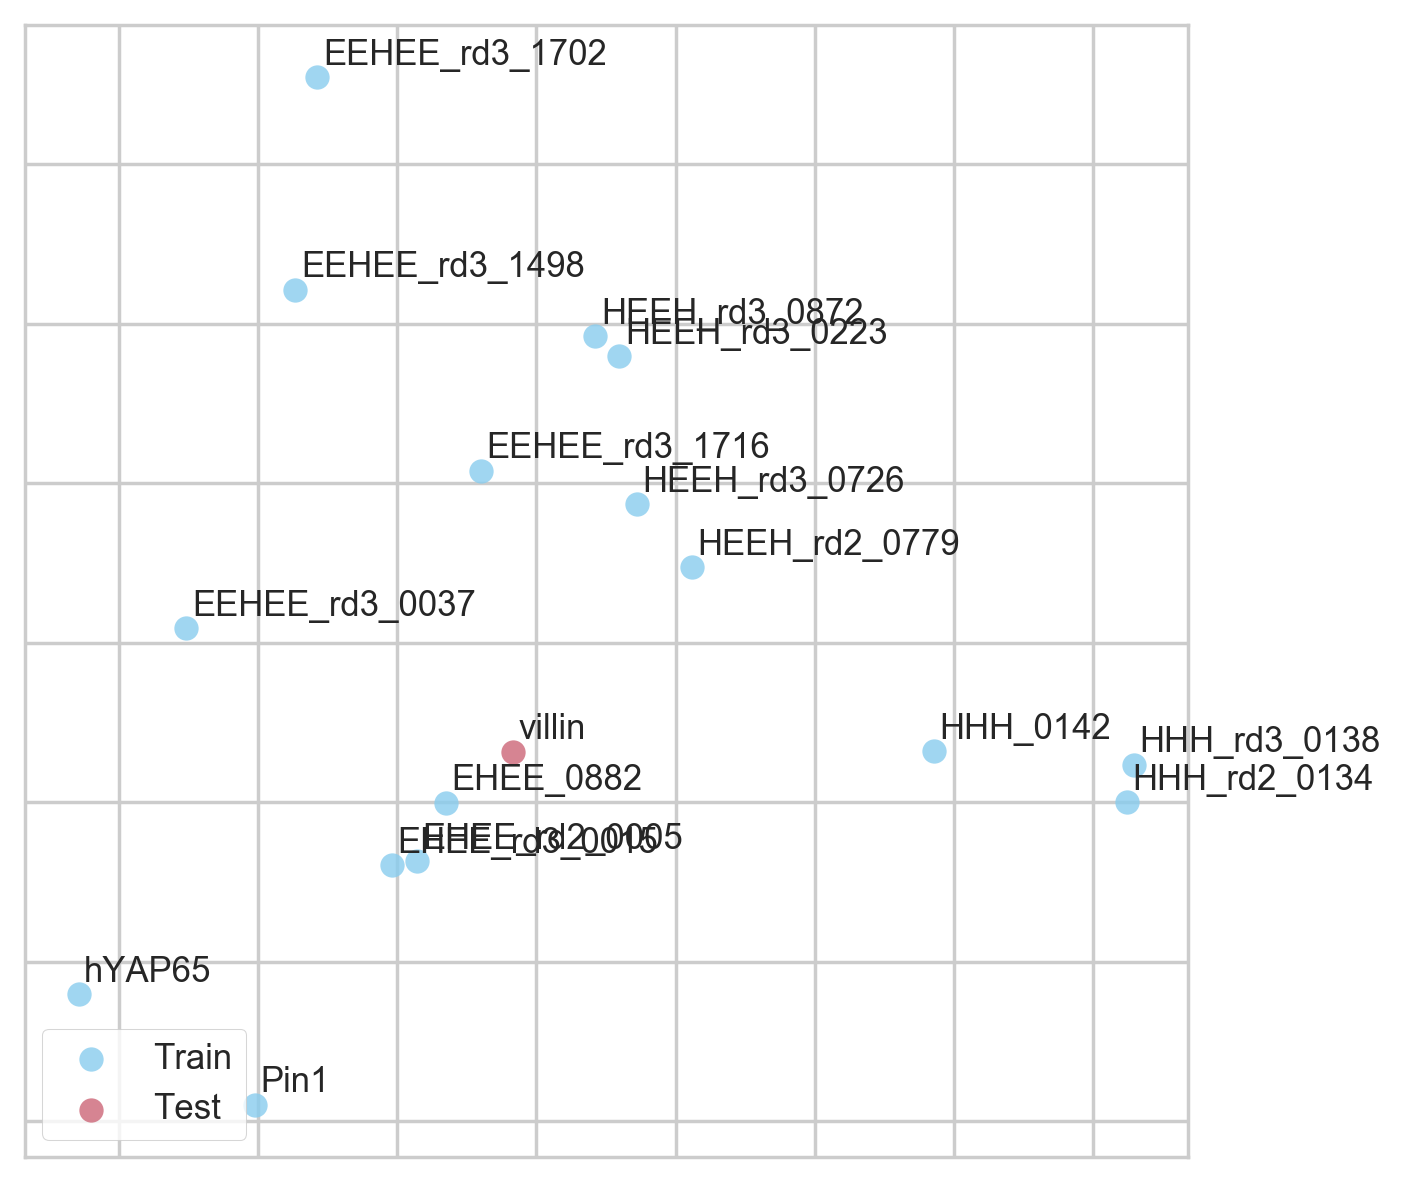

In [10]:
set_pub_plot_context(context="notebook")
name_of_test = ['villin']
name_of_train = wt_ssm2[~wt_ssm2['name'].isin(name_of_test)]['name']
test_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_test)].index.values
train_idxs = wt_ssm2[~wt_ssm2['name'].isin(name_of_test)].index.values
fig = plt.figure(figsize=(6,6), dpi=250)
ax = fig.add_subplot(111)
x = components[train_idxs,0]
y = components[train_idxs,1]
color = mpl.colors.rgb2hex(sns.color_palette()[0])
sns.regplot(x=x, y=y, fit_reg=False, ax=ax, color=color, label="Train")
label_point(pd.Series(x),pd.Series(y+.04),
            pd.Series(np.array(name_of_train)).map(lambda x: x.split(".")[0])
            ,ax, fontsize=10)

x = components[test_idxs,0]
y = components[test_idxs,1]
color = mpl.colors.rgb2hex(sns.color_palette()[1])
sns.regplot(x=x, y=y, fit_reg=False, ax=ax, color=color, label="Test")
label_point(pd.Series(x),pd.Series(y+.04),
            pd.Series(np.array(name_of_test)).map(lambda x: x.split(".")[0])
            ,ax, fontsize=10)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.legend(loc="lower left",fancybox=True, frameon=True)
save_for_pub(fig, path="./img/f", dpi=250)

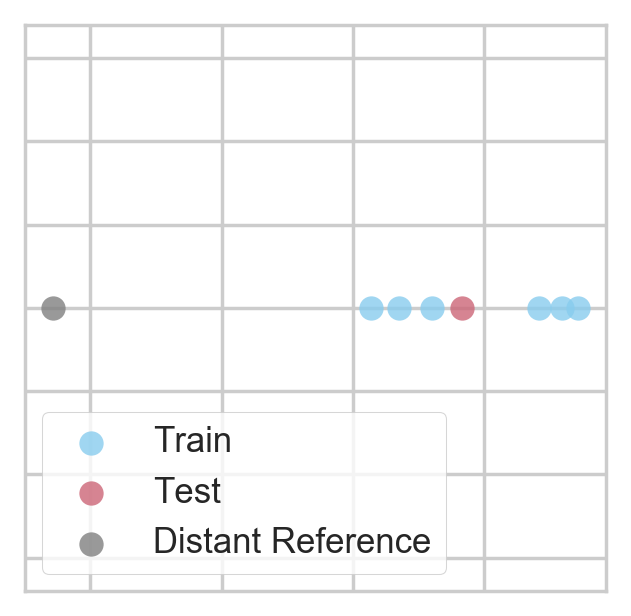

In [11]:
# now plot again but color these
y_bump = -.001
set_pub_plot_context(context="notebook")
name_of_reference = ['hYAP65']
name_of_test = ['villin', ]
name_of_train = ['HEEH_rd3_0872.pdb','HEEH_rd3_0223.pdb','HEEH_rd3_0726.pdb',
                 'EEHEE_rd3_1716.pdb',
                 "EHEE_rd2_0005.pdb", "EHEE_0882.pdb"]
test_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_test)].index.values
train_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_train)].index.values
ref_idxs = wt_ssm2[wt_ssm2['name'].isin(name_of_reference)].index.values
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111)
x = components[train_idxs,0].tolist()

y = np.zeros(len(train_idxs)).tolist()

color = mpl.colors.rgb2hex(sns.color_palette()[0])
sns.regplot(x=np.array(x), y=np.array(y), fit_reg=False, ax=ax, color=color, label="Train")


x = components[test_idxs,0].tolist()
y = np.zeros(len(test_idxs)).tolist()
color = mpl.colors.rgb2hex(sns.color_palette()[1])
sns.regplot(x=np.array(x), y=np.array(y), fit_reg=False, ax=ax, color=color, label="Test")

x = components[ref_idxs,0].tolist()
y = np.zeros(len(ref_idxs)).tolist()
color = 'grey'
sns.regplot(x=np.array(x), y=np.array(y), fit_reg=False, ax=ax, color=color, label="Distant Reference")
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.legend(loc="lower left",fancybox=True, frameon=True)
save_for_pub(fig, path="./img/a_bottom", dpi=250)